In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


import sys
import os

sys.path.append(os.path.abspath("../src"))

from scheduler.stochastic_source import StochasticSource, IID, Discrete, AR1, ColoredNoise
from scheduler.task_models import Task, PeriodicTask
from scheduler.processor import Uniprocessor
from scheduler.supplementary import PlotManager, get_periodic_tasks_hyperperiod

def plot_setup(x):
  plt.figure(figsize=(14,6))
  plt.plot(x, marker='o')
  plt.grid()
  plt.show()

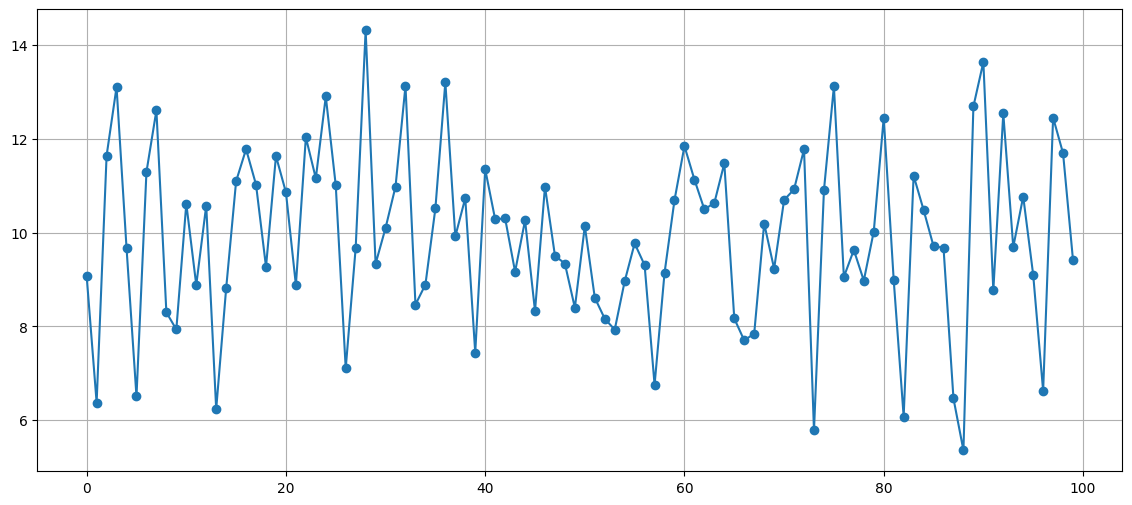

In [2]:
src = IID(lambda n, r: np.random.normal(10,2,n))

x = src.sample(n=100)
plot_setup(x)

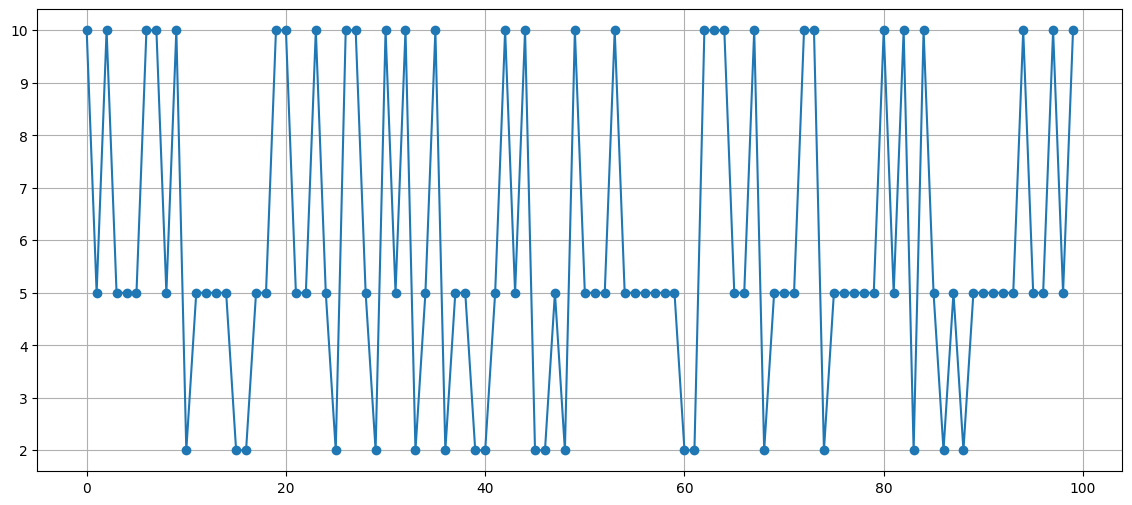

In [3]:
src = Discrete({2: 0.2, 5: 0.5, 10: 0.3})

x = src.sample(n=100)
plot_setup(x)

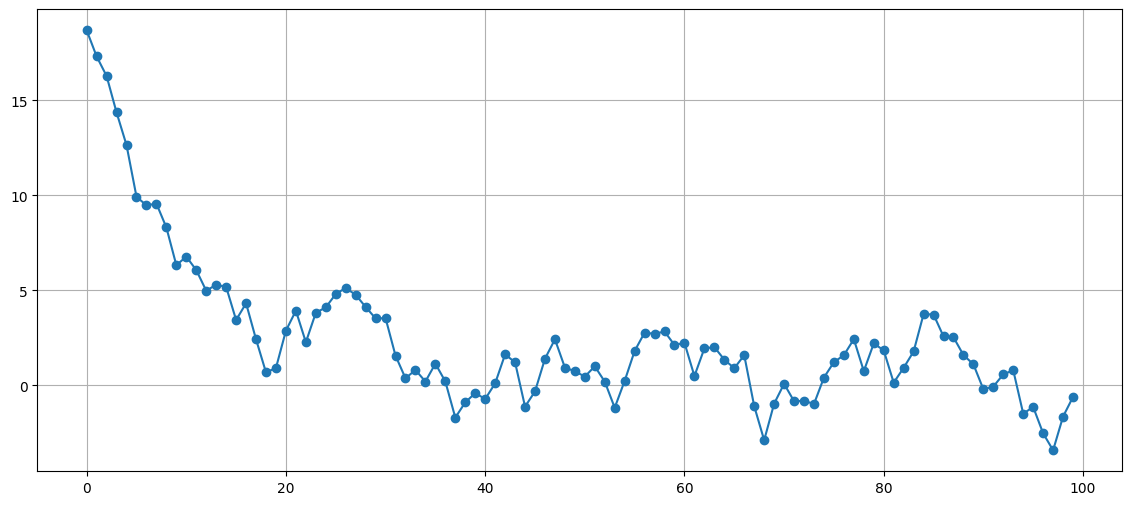

In [4]:
src = AR1(x0 = 20, rho=0.9)

x = src.sample(n=100)
plot_setup(x)

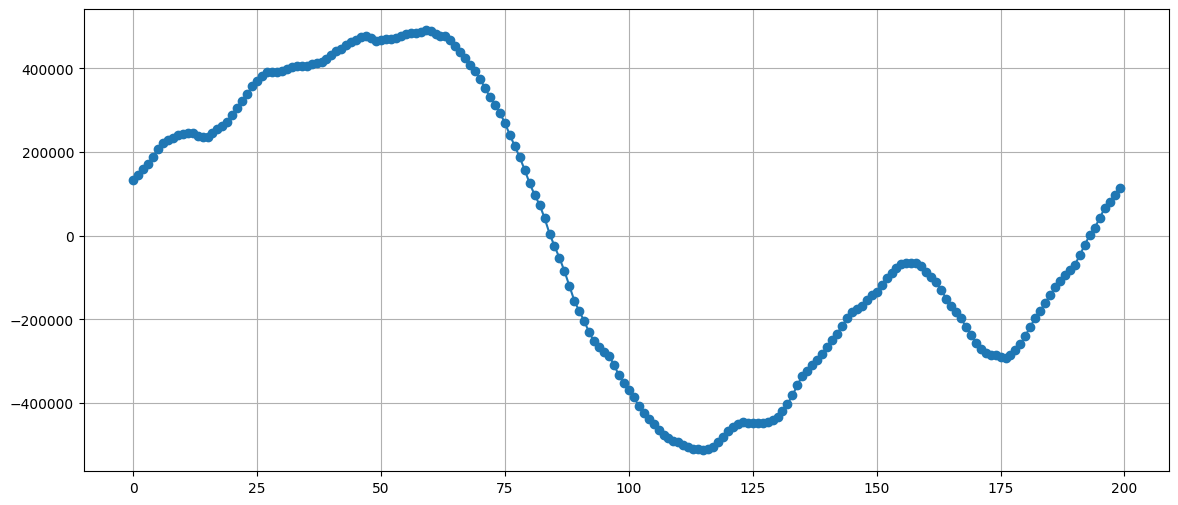

In [5]:
src = ColoredNoise(alpha=2, mean=0, std=1)

x = src.sample(n=200)
x = x / np.mean(x)
plot_setup(x)

In [6]:
from scheduler.task_models import PeriodicTask, Job

In [7]:
T1 = PeriodicTask(name="T1", period=10, priority=1, execution_deviation_distribution=src)

T1.sample_jobs_until(50)


[Job(task=PeriodicTask(name='T1', priority=1, relative_deadline=10, period=10, offset=0.0, base_execution_time=1.0, execution_deviation_distribution=ColoredNoise(seed=None, _rng=Generator(PCG64) at 0x1154FFBC0), jitter_distribution=None), release_time=0.0, execution_time=18.608030336537645, relative_deadline=10, service_start=None, job_index=0),
 Job(task=PeriodicTask(name='T1', priority=1, relative_deadline=10, period=10, offset=0.0, base_execution_time=1.0, execution_deviation_distribution=ColoredNoise(seed=None, _rng=Generator(PCG64) at 0x1154FFBC0), jitter_distribution=None), release_time=10.0, execution_time=0.9730647708248027, relative_deadline=10, service_start=None, job_index=1),
 Job(task=PeriodicTask(name='T1', priority=1, relative_deadline=10, period=10, offset=0.0, base_execution_time=1.0, execution_deviation_distribution=ColoredNoise(seed=None, _rng=Generator(PCG64) at 0x1154FFBC0), jitter_distribution=None), release_time=20.0, execution_time=3.5327052399975374, relative_d

In [8]:
# x = np.random.normal(10,2,100000000)
# x.sort()

In [9]:
# x = np.arange(100000000)
# x.sort()

In [10]:
from math import lcm

periods = [6, 8, 3, 24]

lcm(*periods)

24

In [11]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[1,2,3], y=[10,20,15],
    mode="lines+markers",
    line=dict(color="blue"),
    name="First segment"
))

tmpp = go.Scatter(
    x=[3,4,5], y=[15,25,30],
    mode="lines+markers",
    line=dict(color="red", dash="dash"),  # <-- dashed line
    name="Second segment"
)

fig.add_trace(tmpp)

fig.add_annotation(
    x=3, y=22, text="Peak A",
    showarrow=True, arrowhead=2, ax=40, ay=-20,
    bgcolor="rgba(255,255,255,0.7)"
)
fig.show()



In [12]:

stack = [1,2,3,4,5]

stack.pop()

5

In [13]:
taskload = []
taskload.append(PeriodicTask(name="T1", period=20, priority=1, base_execution_time=5))
taskload.append(PeriodicTask(name="T2", offset=2, period=5, priority=1, base_execution_time=3, relative_deadline=4))
taskload.append(PeriodicTask(name="T3", period=20, priority=1, base_execution_time=1))


In [14]:
interval = 50

P = Uniprocessor(policy="FIFO", taskload=taskload)
WL = P.get_workload_until(interval)
T = get_periodic_tasks_hyperperiod(taskload)
PM = PlotManager(WL)
myfig = PM.plot_backlog()
for i in range(interval // T):
  myfig.add_vline(
      x=T*(i+1),
      line=dict(color="black", width=1),
      opacity=0.4
  )
myfig.show()

Current time: 0.0, current backlog: 0.0, queue: []
Current time: 5.0, current backlog: 4.0, queue: [Job(task=PeriodicTask(name='T3', priority=1, relative_deadline=10, period=20, offset=0.0, base_execution_time=1, execution_deviation_distribution=None, jitter_distribution=None), release_time=0.0, execution_time=1.0, relative_deadline=10, service_start=None, job_index=0), Job(task=PeriodicTask(name='T2', priority=1, relative_deadline=4, period=5, offset=2, base_execution_time=3, execution_deviation_distribution=None, jitter_distribution=None), release_time=2.0, execution_time=3.0, relative_deadline=4, service_start=None, job_index=0)]
Current time: 6.0, current backlog: 3.0, queue: [Job(task=PeriodicTask(name='T2', priority=1, relative_deadline=4, period=5, offset=2, base_execution_time=3, execution_deviation_distribution=None, jitter_distribution=None), release_time=2.0, execution_time=3.0, relative_deadline=4, service_start=None, job_index=0)]
Current time: 9.0, current backlog: 3.0, q

In [15]:
WL

[Job(task=PeriodicTask(name='T1', priority=1, relative_deadline=10, period=20, offset=0.0, base_execution_time=5, execution_deviation_distribution=None, jitter_distribution=None), release_time=0.0, execution_time=5.0, relative_deadline=10, service_start=2.0, job_index=0),
 Job(task=PeriodicTask(name='T3', priority=1, relative_deadline=10, period=20, offset=0.0, base_execution_time=1, execution_deviation_distribution=None, jitter_distribution=None), release_time=0.0, execution_time=1.0, relative_deadline=10, service_start=5.0, job_index=0),
 Job(task=PeriodicTask(name='T2', priority=1, relative_deadline=4, period=5, offset=2, base_execution_time=3, execution_deviation_distribution=None, jitter_distribution=None), release_time=2.0, execution_time=3.0, relative_deadline=4, service_start=6.0, job_index=0),
 Job(task=PeriodicTask(name='T2', priority=1, relative_deadline=4, period=5, offset=2, base_execution_time=3, execution_deviation_distribution=None, jitter_distribution=None), release_ti

In [16]:
arr = [1,2,3]
arr.append(4)
arr

[1, 2, 3, 4]

In [17]:
arr.pop()

4

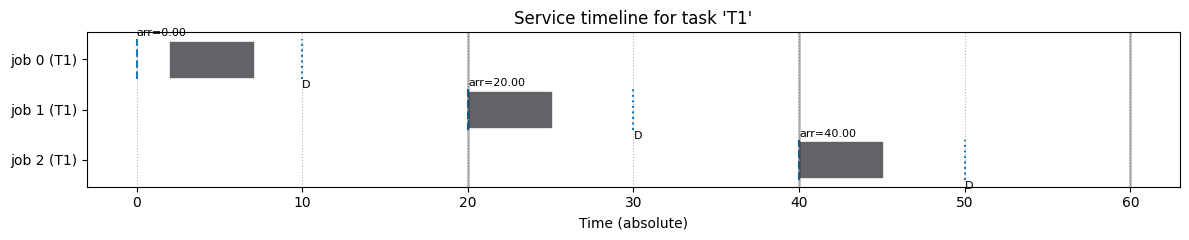

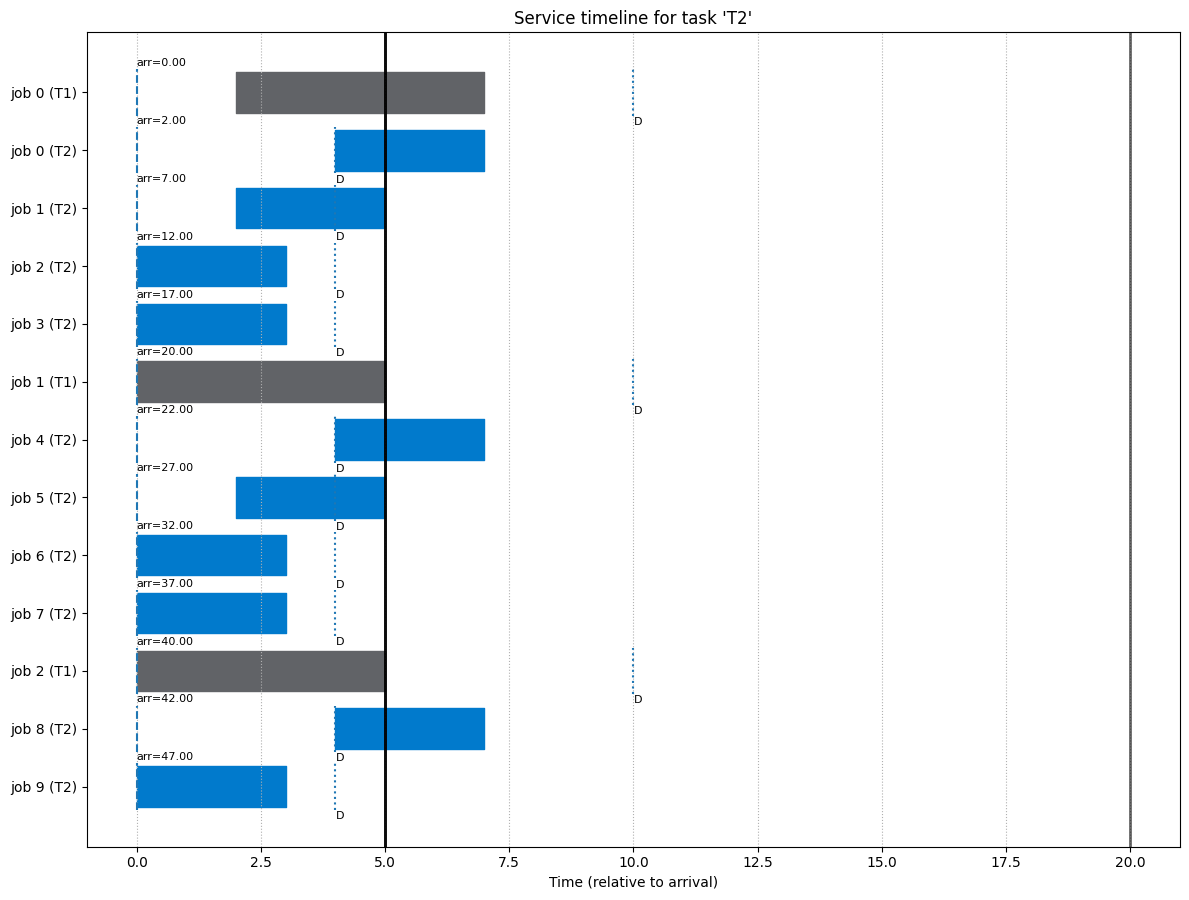

In [18]:
PM.plot_task_timeline(tasks_names_reference=["T1"], relative_to_arrival=False, sort_reverse=True)
PM.plot_task_timeline(tasks_names_reference=["T1", "T2"], relative_to_arrival=True, sort_reverse=True)